Read .nc files

In [3]:
import xarray as xr

# Open the NetCDF file
file_path = r"D:\IPMA\FRP\FRP_2000_2024_grid.nc"
ds = xr.open_dataset(file_path)

# Display the dataset's structure and metadata
print("Dataset Overview:\n")
print(ds)

# List all variables in the dataset
print("\nAvailable Variables:")
for var in ds.variables:
    print(f"- {var}: {ds[var].dims}, {ds[var].shape}")


Dataset Overview:

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 8827, latitude: 42, longitude: 64)
Coordinates:
  * time        (time) datetime64[ns] 71kB 2000-11-01 2000-11-02 ... 2024-12-31
  * latitude    (latitude) float64 336B 34.5 35.25 36.0 ... 63.75 64.5 65.25
  * longitude   (longitude) float64 512B -12.0 -11.25 -10.5 ... 33.75 34.5 35.25
Data variables:
    FRP_sum     (time, latitude, longitude) float64 190MB ...
    FRP_mean    (time, latitude, longitude) float64 190MB ...
    FRP_median  (time, latitude, longitude) float64 190MB ...
    FRP_max     (time, latitude, longitude) float64 190MB ...
    FRP_min     (time, latitude, longitude) float64 190MB ...
    FRP_std     (time, latitude, longitude) float64 190MB ...
    count       (time, latitude, longitude) float64 190MB ...
Attributes:
    title:            Daily Gridded FRP Statistics (0.75° × 0.75°)
    source_file:      FRP_2000_2024.csv
    grid_resolution:  0.75 degrees
    description:      Includes daily FRP 

View nc file in table

In [5]:
import xarray as xr
import pandas as pd

# Open the NetCDF file
nc_file = r"D:\IPMA\FRP\fire_labels_by_region\fire_data_Portugal.nc"
ds = xr.open_dataset(nc_file)

# Convert all variables to a DataFrame
df = ds.to_dataframe().reset_index()

# Display the first few rows
print(df.head())

df


        time  latitude  longitude  fire_binary_Portugal  fire_label_Portugal
0 2000-11-01      34.5     -12.00                   NaN                  NaN
1 2000-11-01      34.5     -11.25                   NaN                  NaN
2 2000-11-01      34.5     -10.50                   NaN                  NaN
3 2000-11-01      34.5      -9.75                   NaN                  NaN
4 2000-11-01      34.5      -9.00                   NaN                  NaN


,time,latitude,longitude,fire_binary_Portugal,fire_label_Portugal
0,2000-11-01,34.50,-12.00,NaN,NaN
1,2000-11-01,34.50,-11.25,NaN,NaN
2,2000-11-01,34.50,-10.50,NaN,NaN
3,2000-11-01,34.50,-9.75,NaN,NaN
4,2000-11-01,34.50,-9.00,NaN,NaN
...,...,...,...,...,...
23726971,2024-12-31,65.25,32.25,NaN,NaN
23726972,2024-12-31,65.25,33.00,NaN,NaN
23726973,2024-12-31,65.25,33.75,NaN,NaN
23726974,2024-12-31,65.25,34.50,NaN,NaN


Read .mat files

In [ ]:
from scipy.io import loadmat

data = loadmat(r"E:\IPMA\Sources\Virgilio\FRP\MODIS_2001.mat", struct_as_record=False, squeeze_me=True)

dados = data["dados"]  # Extract variable

print("Type of 'dados':", type(dados))

if hasattr(dados, "_fieldnames"):  # Check if it's a struct
    print("Struct fields:", dados._fieldnames)
    for field in dados._fieldnames:
        print(f"Field '{field}':", getattr(dados, field))

View .mat on map

In [ ]:
import scipy.io
import folium

# Step 1: Load the .mat file
mat_data = scipy.io.loadmat(r"E:\IPMA\Sources\Virgilio\FRP\MODIS_2001.mat")  # Replace 'your_file.mat' with your file's name

# Step 2: Inspect the contents of the .mat file to find the data
print(mat_data.keys())  # This will list all variables in the .mat file

# Step 3: Extract latitude and longitude (adjust if your data keys are different)
# Assuming that 'latitudes' and 'longitudes' are the keys in your .mat file
latitudes = mat_data['lat'].flatten()  # Flatten in case the data is in an array form
longitudes = mat_data['lon'].flatten()

# Step 4: Create a map centered around the first set of coordinates (you can adjust this)
my_map = folium.Map(location=[latitudes[0], longitudes[0]], zoom_start=10)

# Step 5: Add markers for each coordinate pair
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(my_map)

# Step 6: Save the map to an HTML file
my_map.save("map.html")

# Step 7: Instructions to view the map
print("Map saved as 'map.html'. Open it in a browser to view the map.")


View .csv file on table

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"E:\IPMA\FRP\FRP_2000_2024.csv"

# Load CSV into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify data loading
print(df.head())

df

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   36.8527    35.3594       306.0   2.1    1.4  2000-11-01       815   
1   49.5459    23.5306       326.6   1.0    1.0  2000-11-01       950   
2   49.5480    23.5170       347.1   1.0    1.0  2000-11-01       950   
3   48.7390    29.1738       306.8   1.5    1.2  2000-11-01       950   
4   49.5695    23.4383       303.8   1.0    1.0  2000-11-01       950   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          60     6.03       294.4  13.2        D     0  
1     Terra      MODIS          84     6.03       286.4  21.9        D     0  
2     Terra      MODIS          95     6.03       291.3  53.6        D     0  
3     Terra      MODIS          33     6.03       287.7  13.7        D     0  
4     Terra      MODIS          57     6.03       286.8   5.6        D     0  


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.8527,35.3594,306.0,2.1,1.4,2000-11-01,815,Terra,MODIS,60,6.03,294.4,13.2,D,0
1,49.5459,23.5306,326.6,1.0,1.0,2000-11-01,950,Terra,MODIS,84,6.03,286.4,21.9,D,0
2,49.5480,23.5170,347.1,1.0,1.0,2000-11-01,950,Terra,MODIS,95,6.03,291.3,53.6,D,0
3,48.7390,29.1738,306.8,1.5,1.2,2000-11-01,950,Terra,MODIS,33,6.03,287.7,13.7,D,0
4,49.5695,23.4383,303.8,1.0,1.0,2000-11-01,950,Terra,MODIS,57,6.03,286.8,5.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022350,44.5394,3.0130,300.9,1.2,1.1,2024-12-31,941,Terra,MODIS,43,61.03,276.7,9.9,D,0
2022351,40.3944,33.5275,311.0,1.2,1.1,2024-12-31,1130,Aqua,MODIS,71,61.03,283.6,16.0,D,0
2022352,40.8579,33.0911,300.0,1.2,1.1,2024-12-31,1130,Aqua,MODIS,22,61.03,280.7,8.5,D,0
2022353,45.2580,31.6737,311.4,1.2,1.1,2024-12-31,1131,Aqua,MODIS,48,61.03,282.5,17.0,D,3


View csv file on map

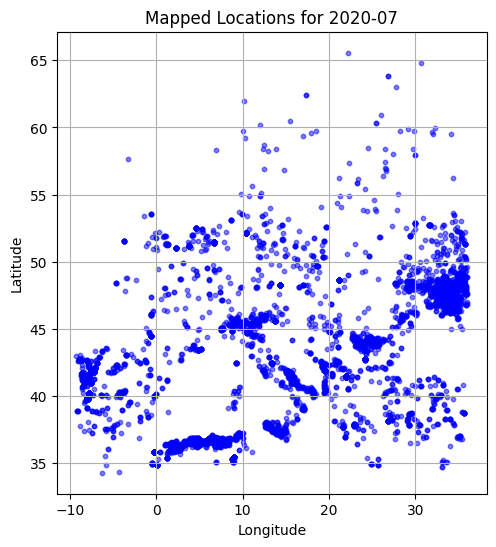

In [5]:
# View map with csv file

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")

# Convert "acq_date" to datetime format and extract year & month
df["acq_date"] = pd.to_datetime(df["acq_date"])
df["year"] = df["acq_date"].dt.year
df["month"] = df["acq_date"].dt.month  # Extract month as integer (1-12)

# Select the year (required) and month (optional)
selected_year = 2020  # Change to desired year (2001-2023)
selected_month = 7  # Set to None to include all months OR set a value (1-12)

# Filter the dataset
if selected_month is not None:
    df = df[(df["year"] == selected_year) & (df["month"] == selected_month)]
else:
    df = df[df["year"] == selected_year]  # Only filter by year

# Convert to GeoDataFrame if data exists
if not df.empty:
    geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

    # Plot the filtered points
    fig, ax = plt.subplots(figsize=(8, 6))
    gdf.plot(ax=ax, color="blue", markersize=10, alpha=0.5)

    title = f"Mapped Locations for {selected_year}"
    if selected_month is not None:
        title += f"-{selected_month:02d}"  # Format as YYYY-MM

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)

    plt.show()
else:
    no_data_msg = f"No data available for {selected_year}"
    if selected_month is not None:
        no_data_msg += f"-{selected_month:02d}"
    print(no_data_msg)



View npy file

In [ ]:
import numpy as np

# Load the .npy file
file_path = r"E:\IPMA\SPEI\SPEI3\SPEI3_1979.npy"
data = np.load(file_path)

# Print structure details
print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Preview (first slice):\n", data[0])  # Print first "layer" of the 3D array

In [ ]:
# To view .npy on map

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load your data (replace with actual .npy file loading)
file_path = r"E:\IPMA\SPI\SPI3\SPI3_1979.npy"
data = np.load(file_path)

# Check the shape of the data
print(f"Data shape: {data.shape}")  # Should be (time, lat, lon)

# Assume latitudes and longitudes based on the shape of the data
time_size, lat_size, lon_size = data.shape
lat_values = np.linspace(34, 66, lat_size)  # Latitude range from -90 to 90 degrees
lon_values = np.linspace(-12, 36, lon_size)  # Longitude range from -180 to 180 degrees

# Create a 2D meshgrid of latitude and longitude for plotting
lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)

# Plot the data using Cartopy (selecting the first time slice as a sample)
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_values.min(), lon_values.max(), lat_values.min(), lat_values.max()])

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the first time slice (index 0) from the data
data_slice = data[0, :, :]  # First time slice
c = ax.pcolormesh(lon_grid, lat_grid, data_slice, cmap="viridis", shading='auto', transform=ccrs.PlateCarree())
fig.colorbar(c, ax=ax, orientation="vertical", label="Data Value")

plt.title("Geospatial Data: First Time Slice")
plt.show()

